Saving archive (3).zip to archive (3) (1).zip
Extracted files: ['.config', 'archive (3).zip', 'archive (3) (1).zip', 'data.csv', 'sample_data']
Detected CSV file: data.csv
Dataset Loaded Successfully!
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.142

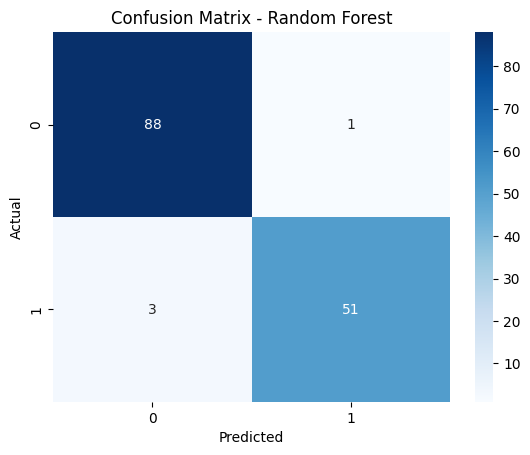


🎉 Project Completed Successfully!


In [3]:
# ============================================================
# 1. Upload ZIP + Extract + Auto-detect CSV + Load + ML Model
# Breast Cancer Classification (Option A)
# ============================================================

# ---- Step 1: Upload ZIP file ----
from google.colab import files
uploaded = files.upload()

# ---- Step 2: Extract ZIP ----
import zipfile
import os

zip_file = list(uploaded.keys())[0]   # automatically get zip filename
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("/content")

print("Extracted files:", os.listdir("/content"))

# ---- Step 3: Auto-detect CSV file ----
csv_file = None
for file in os.listdir("/content"):
    if file.endswith(".csv"):
        csv_file = file
        break

if csv_file is None:
    raise FileNotFoundError("No CSV file found inside the ZIP. Check ZIP contents.")

print("Detected CSV file:", csv_file)

# ---- Step 4: Load Dataset ----
import pandas as pd
df = pd.read_csv(f"/content/{csv_file}")
print("Dataset Loaded Successfully!")
print(df.head())

# ============================================================
# 2. Preprocessing
# ============================================================

# Remove unnecessary columns if present
df = df.drop(columns=['Unnamed: 32', 'id'], errors='ignore')

# Encode target
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Feature-target split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ============================================================
# 3. Train Models
# ============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# ============================================================
# 4. Evaluation
# ============================================================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\n=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n🎉 Project Completed Successfully!")
